In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [10]:
def analyse(tailles, temps, complexity_function):

    a = 10
    log_taille = list(map(lambda v: math.log(v, a), tailles))
    log_temps = list(map(lambda v: math.log(v, a), temps))

    X = np.array([np.array([e]) for e in log_taille])
    y = np.array(log_temps)
    print('Test puissance')
    reg = LinearRegression().fit(X, y)
    m = reg.coef_[0]
    b = reg.intercept_
    print(f'score: {reg.score(X, y)}')
    print(f'm: {m}')
    print(f'b: {b}')
    print(f'a: {a}')
    print(f'y = {pow(a, b)} * x^{m}')
    print()

    rapports = [v/complexity_function(tailles[i]) for i, v in enumerate(temps)]
    X = np.array([np.array([e]) for e in tailles])
    y = np.array(rapports)
    print('Test du rapport')
    reg = LinearRegression().fit(X, y)
    b = reg.intercept_
    print(f'score: {reg.score(X, y)}')
    print(f'b: {b}')
    print(f'y/f(x) = {b} * x')
    print()
    import matplotlib
    matplotlib.pyplot.plot(tailles, rapports, '-ok')

    f_de_taille = list(map(complexity_function, tailles))
    X = np.array([np.array([e]) for e in f_de_taille])
    y = np.array(temps)
    print('Test des constantes')
    reg = LinearRegression().fit(X, y)
    c = reg.coef_[0]
    b = reg.intercept_
    print(f'score: {reg.score(X, y)}')
    print(f'c: {c}')
    print(f'b: {b}')
    print(f'y = {c} * f(x) + {b}')


algo conventionnel
Test puissance
score: 0.999717031141583
m: 3.0535873647856246
b: -4.891457486232942
a: 10
y = 1.283933450577334e-05 * x^3.0535873647856246

Test du rapport
score: 0.32483169780920107
b: 1.5928427398204807e-05
y/f(x) = 1.5928427398204807e-05 * x

Test des constantes
score: 0.9999839678994382
c: 1.6919133083694366e-05
b: 0.25935157142858145
y = 1.6919133083694366e-05 * f(x) + 0.25935157142858145



algo strassen
Test puissance
score: 0.9994632740122339
m: 2.679618480756167
b: -1.9238811103169655
a: 10
y = 0.011915681594702097 * x^2.679618480756167

Test du rapport
score: 0.9357951085823781
b: 0.007339995538440962
y/f(x) = 0.007339995538440962 * x

Test des constantes
score: 0.9995170644653062
c: 0.005647238162938732
b: 493.63376333333144
y = 0.005647238162938732 * f(x) + 493.63376333333144



algo strassen avec limite
Test puissance
score: 0.9997390810042278
m: 2.857032140623897
b: -4.317463284105205
a: 10
y = 4.814339534148334e-05 * x^2.857032140623897

Test du rappor

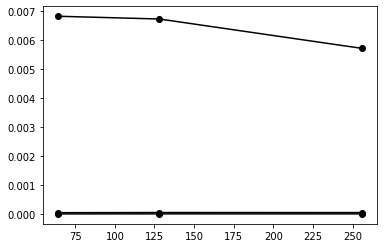

In [11]:
df = pd.read_csv("results.csv", encoding='utf-8-sig', sep='\s*,\s*', engine='python').groupby(['algo1','taille1']).mean().reset_index()
df_tail = df.tail(3).reset_index()
print('algo conventionnel')
analyse(df_tail['taille1'], df_tail['temps1'], lambda n: pow(n, 3))
print('\n\n')
print('algo strassen')
analyse(df_tail['taille2'], df_tail['temps2'], lambda n: pow(n, math.log(7, 2)))
print('\n\n')
print('algo strassen avec limite')
analyse(df_tail['taille3'], df_tail['temps3'], lambda n: pow(n, math.log(7, 2)))

puissance

,size,avg_time,algo
0,2,0.005171,conv
1,2,0.003529,strassenSeuil
2,2,0.032519,strassen
3,4,0.006386,conv
4,4,0.004438,strassenSeuil
5,4,0.191243,strassen
6,8,0.015276,conv
7,8,0.012010,strassenSeuil
8,8,1.153662,strassen
9,16,0.040419,conv


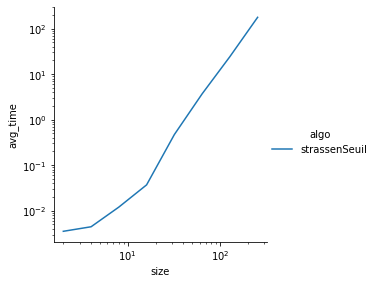

In [7]:
df = pd.read_csv("results.csv", encoding='utf-8-sig', sep='\s*,\s*', engine='python').groupby(['algo1','taille1']).mean().reset_index()
df2 = pd.read_csv('new_data.csv')
g = sns.FacetGrid(df2[df2['algo'] == 'strassenSeuil'], hue='algo', height=4, aspect=1)
g = g.map(plt.plot, 'size', 'avg_time')
g.set(xscale='log')
g.set(yscale='log')
g.add_legend()
df2

In [46]:
a = [0, 1]
b = [50, 2]

X = np.array([np.array([e]) for e in a])
y = np.array(b)
# X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# # y = 1 * x_0 + 2 * x_1 + 3
# y = np.dot(X, np.array([1, 2])) + 3
# print(y)
reg = LinearRegression().fit(X, y)
print(f'score: {reg.score(X, y)}')
reg.intercept_

score: 1.0


50.0

,algo2,taille2,taille1,temps1,f1,rapport1,temps2,f2,rapport2,taille3,temps3,f3,rapport3
0,strassen,4,4.0,0.013377,4.897590e+01,0.000273,0.382979,4.897590e+01,0.007820,4.0,0.009192,4.897590e+01,0.000188
1,strassen,8,8.0,0.021866,3.427469e+02,0.000064,2.489490,3.427469e+02,0.007263,8.0,0.017357,3.427469e+02,0.000051
2,strassen,16,16.0,0.081323,2.398638e+03,0.000034,16.039740,2.398638e+03,0.006687,16.0,0.068836,2.398638e+03,0.000029
3,strassen,32,32.0,0.544953,1.678634e+04,0.000032,119.725275,1.678634e+04,0.007133,32.0,0.925038,1.678634e+04,0.000055
4,strassen,64,64.0,4.120426,1.174755e+05,0.000035,803.895880,1.174755e+05,0.006843,64.0,6.836426,1.174755e+05,0.000058
5,strassen,128,128.0,36.387292,8.221260e+05,0.000044,5549.097000,8.221260e+05,0.006749,128.0,52.353654,8.221260e+05,0.000064
6,strassen,256,256.0,284.043530,5.753466e+06,0.000049,32998.248000,5.753466e+06,0.005735,256.0,358.867280,5.753466e+06,0.000062


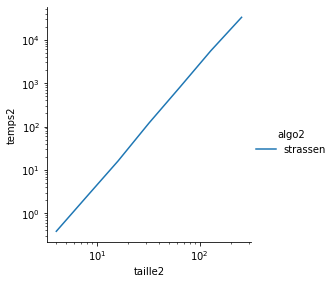

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("results.csv", encoding='utf-8-sig', sep='\s*,\s*', engine='python').groupby(['algo2','taille2']).mean().reset_index()

g = sns.FacetGrid(df, hue='algo2', height=4, aspect=1)
g = g.map(plt.plot, 'taille2', 'temps2')
g.set(xscale='log')
g.set(yscale='log')
g.add_legend()
plt.savefig('test_puissance')
df

,algo3,taille3,taille1,temps1,f1,rapport1,taille2,temps2,f2,rapport2,temps3,f3,rapport3
0,strassenAvecLimite,4,4.0,0.013377,4.897590e+01,0.000273,4.0,0.382979,4.897590e+01,0.007820,0.009192,4.897590e+01,0.000188
1,strassenAvecLimite,8,8.0,0.021866,3.427469e+02,0.000064,8.0,2.489490,3.427469e+02,0.007263,0.017357,3.427469e+02,0.000051
2,strassenAvecLimite,16,16.0,0.081323,2.398638e+03,0.000034,16.0,16.039740,2.398638e+03,0.006687,0.068836,2.398638e+03,0.000029
3,strassenAvecLimite,32,32.0,0.544953,1.678634e+04,0.000032,32.0,119.725275,1.678634e+04,0.007133,0.925038,1.678634e+04,0.000055
4,strassenAvecLimite,64,64.0,4.120426,1.174755e+05,0.000035,64.0,803.895880,1.174755e+05,0.006843,6.836426,1.174755e+05,0.000058
5,strassenAvecLimite,128,128.0,36.387292,8.221260e+05,0.000044,128.0,5549.097000,8.221260e+05,0.006749,52.353654,8.221260e+05,0.000064
6,strassenAvecLimite,256,256.0,284.043530,5.753466e+06,0.000049,256.0,32998.248000,5.753466e+06,0.005735,358.867280,5.753466e+06,0.000062


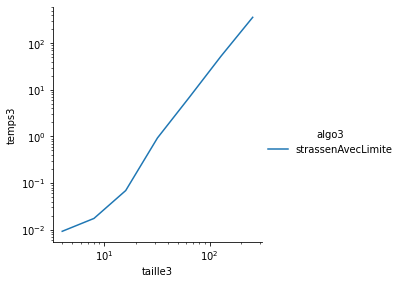

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("results.csv", encoding='utf-8-sig', sep='\s*,\s*', engine='python').groupby(['algo3','taille3']).mean().reset_index()

g = sns.FacetGrid(df, hue='algo3', height=4, aspect=1)
g = g.map(plt.plot, 'taille3', 'temps3')
g.set(xscale='log')
g.set(yscale='log')
g.add_legend()
plt.savefig('test_puissance')
df

rapport

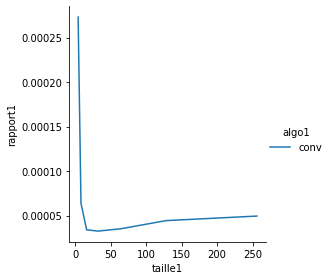

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("results.csv", encoding='utf-8-sig', sep='\s*,\s*', engine='python').groupby(['algo1','taille1']).mean().reset_index()

g = sns.FacetGrid(df, hue='algo1', height=4, aspect=1)
g = g.map(plt.plot, 'taille1', 'rapport1')
g.set(xscale='linear')
g.set(yscale='linear')
g.add_legend()
plt.savefig('test_rapport')

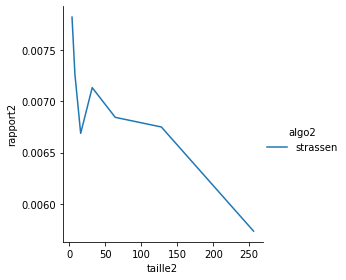

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("results.csv", encoding='utf-8-sig', sep='\s*,\s*', engine='python').groupby(['algo2','taille2']).mean().reset_index()

g = sns.FacetGrid(df, hue='algo2', height=4, aspect=1)
g = g.map(plt.plot, 'taille2', 'rapport2')
g.set(xscale='linear')
g.set(yscale='linear')
g.add_legend()
plt.savefig('test_rapport')

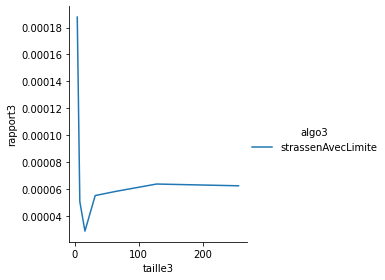

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("results.csv", encoding='utf-8-sig', sep='\s*,\s*', engine='python').groupby(['algo3','taille3']).mean().reset_index()

g = sns.FacetGrid(df, hue='algo3', height=4, aspect=1)
g = g.map(plt.plot, 'taille3', 'rapport3')
g.set(xscale='linear')
g.set(yscale='linear')
g.add_legend()
plt.savefig('test_rapport')

constante

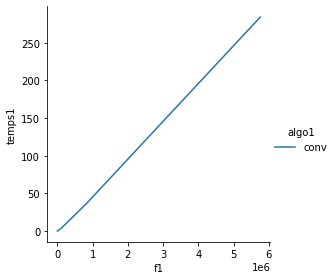

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("results.csv", encoding='utf-8-sig', sep='\s*,\s*', engine='python').groupby(['algo1','taille1']).mean().reset_index()

g = sns.FacetGrid(df, hue='algo1', height=4, aspect=1)
g = g.map(plt.plot, 'f1', 'temps1')
g.set(xscale='linear')
g.set(yscale='linear')
g.add_legend()
plt.savefig('test_rapport')

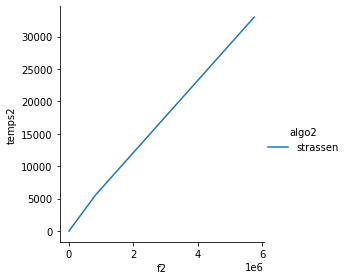

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("results.csv", encoding='utf-8-sig', sep='\s*,\s*', engine='python').groupby(['algo2','taille2']).mean().reset_index()

g = sns.FacetGrid(df, hue='algo2', height=4, aspect=1)
g = g.map(plt.plot, 'f2', 'temps2')
g.set(xscale='linear')
g.set(yscale='linear')
g.add_legend()
plt.savefig('test_rapport')

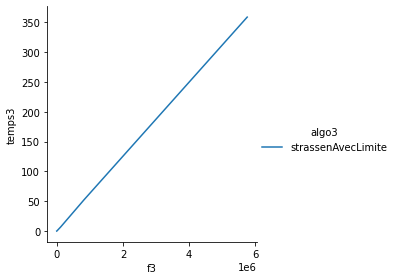

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("results.csv", encoding='utf-8-sig', sep='\s*,\s*', engine='python').groupby(['algo3','taille3']).mean().reset_index()

g = sns.FacetGrid(df, hue='algo3', height=4, aspect=1)
g = g.map(plt.plot, 'f3', 'temps3')
g.set(xscale='linear')
g.set(yscale='linear')
g.add_legend()
plt.savefig('test_rapport')